In [140]:
import pandas as pd

In [146]:
import numpy as np
from sklearn.preprocessing import StandardScaler

input_data = pd.read_csv("input.csv")
x1 = np.array(input_data['X1 kernel_area'])
x2 = np.array(input_data['X2 kernel_length'])
y = np.array(input_data['Wheat Varieties'])
for i in range(x2.size):
    x2[i] = float(x2[i].replace(',','')) # remove comma
# print(x2)
    
X = np.c_[x1, x2]
ss = StandardScaler()

X_scaled = ss.fit_transform(X)
# print(x_scaled)
for i in range(y.size):
    if y[i] == ' Kama ': y[i] = 0
    elif y[i] == ' Rosa ': y[i] = 1
    else: y[i] = 2
y = y.astype(int)
# print(y)

In [147]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", C=10) # softmax
log_reg.fit(X, y)

LogisticRegression(C=10)

In [148]:
print(x1.min(), x1.max())
print(x2.min(), x2.max())

10.59 21.18
4.83 6498.0


In [154]:
x0, x1 = np.meshgrid(
        np.linspace(10, 22, 500).reshape(-1, 1),
        np.linspace(5, 6500, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new

array([[1.00000000e+01, 5.00000000e+00],
       [1.00240481e+01, 5.00000000e+00],
       [1.00480962e+01, 5.00000000e+00],
       ...,
       [2.19519038e+01, 6.50000000e+03],
       [2.19759519e+01, 6.50000000e+03],
       [2.20000000e+01, 6.50000000e+03]])

[[1.45326501e-03 1.01063155e-11 9.98546735e-01]
 [1.52239056e-03 1.13440429e-11 9.98477609e-01]
 [1.59479888e-03 1.27333138e-11 9.98405201e-01]
 ...
 [3.26082470e-08 9.99999967e-01 5.81127346e-16]
 [3.04322252e-08 9.99999970e-01 5.17685782e-16]
 [2.84014143e-08 9.99999972e-01 4.61170122e-16]]
[2 2 2 ... 1 1 1]


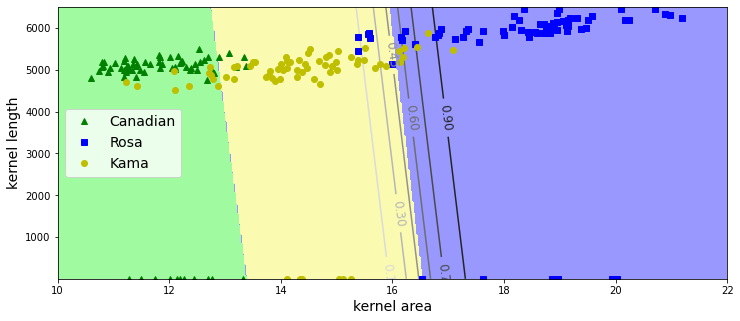

In [156]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

y_proba = log_reg.predict_proba(X_new)
y_predict = log_reg.predict(X_new)

print(y_proba)
print(y_predict)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(12, 5))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Canadian")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Rosa")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Kama")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.binary)
plt.clabel(contour, inline=True, fontsize=12)
plt.xlabel("kernel area", fontsize=14)
plt.ylabel("kernel length", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([10, 22, 5, 6500])
plt.show()